# **Projeto de Previsão de Popularidade de Músicas usando Machine Learning**

**Autor: Raul Lemelle** 

*06 de Fevereiro de 2024.*

Este projeto tem como objetivo desenvolver um modelo de machine learning capaz de prever a popularidade de músicas com base em diversas características musicais. A popularidade é uma métrica crucial na indústria da música, impactando o sucesso de artistas, plataformas de streaming e profissionais do setor.

# Problema

O aumento nas opções de streaming de música e a diversidade de preferências dos ouvintes tornam desafiadora a compreensão e previsão da popularidade de uma música. Este projeto visa resolver esse problema, explorando como as características musicais, como acústica, dancabilidade, energia, instrumentalidade, entre outras, contribuem para a popularidade de uma música.

# Justificativa

- **Otimização de Catálogo:** Compreender as características que influenciam a popularidade permite que as plataformas de streaming otimizem seus catálogos, promovendo músicas mais propensas a atrair uma audiência mais ampla.

- **Apoio a Artistas:** Artistas e gravadoras podem se beneficiar ao entender quais características musicais estão associadas a maior popularidade, orientando suas decisões de produção e promoção.

- **Experiência do Usuário:** Plataformas de streaming podem melhorar a experiência do usuário ao recomendar músicas mais alinhadas aos gostos individuais dos ouvintes.

## Metodologia

- **Análise de Dados:** Utilizamos um conjunto de dados contendo informações sobre músicas, incluindo artistas, características musicais e a variável alvo, "popularidade".

- **Machine Learning:** Implementamos um modelo de regressão (Random Forest Regressor neste exemplo) para prever a popularidade com base nas características fornecidas.

- **Avaliação do Modelo:** Avaliamos o desempenho do modelo utilizando a métrica de Erro Quadrático Médio (Mean Squared Error) e visualizamos a importância relativa das características.


**Importando bibliotecas e pacotes**

In [7]:
import csv
import pandas as pd
import requests

from io import StringIO 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

**Carregar banco de dados no DataFrame Pandas**

A nossa base de dados, denominada "music_genre.csv", encontra-se hospedada em um repositório no [meu perfil do GitHub.](https://github.com/Raul-Lemelle)

In [8]:
def obter_DataFrame_csv(url):
    # Solicitação para obter o arquivo
    response = requests.get(url)

    # Verificando solicitação -> bem-sucedida (código de status 200)
    if response.status_code == 200:
        # StringIO para criar um objeto de arquivo temporário
        csv_data = StringIO(response.text)

        # Criar um DataFrame
        df = pd.read_csv(csv_data)
        return df
    else:
        # Solicitação -> não foi bem-sucedida
        print(f"Falha na solicitação. Código de status: {response.status_code}")
        return None

In [9]:
URL = 'https://raw.githubusercontent.com/Raul-Lemelle/data/main/data_music/music_genre.csv'

In [10]:
df = obter_DataFrame_csv(URL)

In [11]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,50000.0,55888.396360,20725.256253,20002.000000,37973.5000,55913.500000,73863.250000,91759.000
popularity,50000.0,44.220420,15.542008,0.000000,34.0000,45.000000,56.000000,99.000
acousticness,50000.0,0.306383,0.341340,0.000000,0.0200,0.144000,0.552000,0.996
danceability,50000.0,0.558241,0.178632,0.059600,0.4420,0.568000,0.687000,0.986
duration_ms,50000.0,221252.602860,128671.957157,-1.000000,174800.0000,219281.000000,268612.250000,4830606.000
energy,50000.0,0.599755,0.264559,0.000792,0.4330,0.643000,0.815000,0.999
instrumentalness,50000.0,0.181601,0.325409,0.000000,0.0000,0.000158,0.155000,0.996
liveness,50000.0,0.193896,0.161637,0.009670,0.0969,0.126000,0.244000,1.000
loudness,50000.0,-9.133761,6.162990,-47.046000,-10.8600,-7.276500,-5.173000,3.744
speechiness,50000.0,0.093586,0.101373,0.022300,0.0361,0.048900,0.098525,0.942


**Considerações Iniciais**

- Algumas colunas do Dataframe não serão pertinentes para nossa análise.

- Dado que o algoritmo escolhido para este caso é o "RandomForestRegressor", realizaremos experimentos para avaliar a normalização/padronização dos dados.

**Tratamento dos dados**

**- Colunas Categóricas**

In [14]:
df.select_dtypes(include=['object']).head()

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
0,Röyksopp,Röyksopp's Night Out,A#,Minor,100.889,4-Apr,Electronic
1,Thievery Corporation,The Shining Path,D,Minor,115.00200000000001,4-Apr,Electronic
2,Dillon Francis,Hurricane,G#,Major,127.994,4-Apr,Electronic
3,Dubloadz,Nitro,C#,Major,128.014,4-Apr,Electronic
4,What So Not,Divide & Conquer,F#,Major,145.036,4-Apr,Electronic


A coluna "obtained_date" possui informações incompletas em relação à data de obtenção; portanto, optaremos por excluir esses registros.

In [15]:
analise_df = df.drop(columns=['obtained_date'])

Coluna "music_genre"

In [16]:
codificador = LabelEncoder()
analise_df['music_genre_nom'] = codificador.fit_transform(analise_df['music_genre'])

Coluna "mode"

In [17]:
analise_df['mode_nom'] = codificador.fit_transform(analise_df['mode'])

Coluna "key"

In [18]:
analise_df['key_nom'] = codificador.fit_transform(analise_df['key'])

Coluna "track_name"

In [19]:
analise_df['track_name_nom'] = codificador.fit_transform(analise_df['track_name'])

Coluna "artist_name"

In [20]:
analise_df['artist_name_nom'] = codificador.fit_transform(analise_df['artist_name'])

Coluna "tempo"

In [21]:
analise_df['tempo'] = analise_df['tempo'].replace('?', float('nan'))

# Converter a coluna para float
analise_df['tempo'] = analise_df['tempo'].astype(float)

# Porcentagem de dados nulos gerado na coluna tempo
analise_df['tempo'].isnull().mean() * 100

9.969003099690031

**- Colunas Numéricas**

In [22]:
analise_df.select_dtypes(include=['float64']).head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


A coluna "instance_id" contém apenas um número de identificação, sendo irrelevante para a análise; portanto, optaremos por excluí-la.

In [23]:
analise_df = analise_df.drop(columns=['instance_id'])

A coluna "duration_ms" contém informações duplicadas, uma vez que já dispomos desses dados na coluna "tempo", e além disso, há incoerências nos valores. Optaremos por excluir a coluna "duration_ms".

In [24]:
analise_df = analise_df.drop(columns=['duration_ms'])

**Coluna "tempo" e "loudness"**


Normalizar as colunas pois estão fora da ordem de grandeza dos demais atritubos

* Método 0

Rodar a IA sem a normalização:

Modelos baseados em árvores, como o RandomForestRegressor,
podem não ser tão sensíveis à escala e podem funcionar bem sem a normalização.

* Método 1

Z-score normalization ou Padronização


* Método 2

Normalização Min-Max


**Verificação de dados faltantes**

In [25]:
porcentagem_nulos = analise_df.isnull().mean() * 100
print(porcentagem_nulos)

artist_name         0.009999
track_name          0.009999
popularity          0.009999
acousticness        0.009999
danceability        0.009999
energy              0.009999
instrumentalness    0.009999
key                 0.009999
liveness            0.009999
loudness            0.009999
mode                0.009999
speechiness         0.009999
tempo               9.969003
valence             0.009999
music_genre         0.009999
music_genre_nom     0.000000
mode_nom            0.000000
key_nom             0.000000
track_name_nom      0.000000
artist_name_nom     0.000000
dtype: float64


Dado o percentual muito baixo de dados nulos, escolheremos a estratégia de remoção desses registros.

In [26]:
analise_df = analise_df.dropna(axis=0)

In [27]:
analise_df.isna().any()

artist_name         False
track_name          False
popularity          False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
valence             False
music_genre         False
music_genre_nom     False
mode_nom            False
key_nom             False
track_name_nom      False
artist_name_nom     False
dtype: bool

**Correlação dos dados**

In [28]:
analise_df.head()

,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,music_genre_nom,mode_nom,key_nom,track_name_nom,artist_name_nom
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic,5,1,1,28371,5029
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic,5,1,5,34817,6117
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,5,0,11,15024,1591
3,Dubloadz,Nitro,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,5,0,4,23372,1707
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,5,0,9,8649,6519


Selecionar colunas de interesse

In [29]:
analise_df.columns

Index(['artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre',
       'music_genre_nom', 'mode_nom', 'key_nom', 'track_name_nom',
       'artist_name_nom'],
      dtype='object')

In [30]:
correlation_df = analise_df[['popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence',
       'music_genre_nom', 'mode_nom', 'key_nom', 'track_name_nom',
       'artist_name_nom']]

In [31]:
correlation_matrix = correlation_df.corr()

Visualizando a matriz de correlação

In [32]:
print(correlation_matrix)

                  popularity  acousticness  danceability    energy  \
popularity          1.000000     -0.292279      0.357465  0.217278   
acousticness       -0.292279      1.000000     -0.349019 -0.790731   
danceability        0.357465     -0.349019      1.000000  0.264175   
energy              0.217278     -0.790731      0.264175  1.000000   
instrumentalness   -0.366275      0.390010     -0.299755 -0.391222   
liveness           -0.041857     -0.108187     -0.052700  0.186015   
loudness            0.319556     -0.730073      0.390295  0.838503   
speechiness         0.223405     -0.165213      0.281113  0.158485   
tempo               0.032843     -0.232658     -0.015223  0.261866   
valence             0.127091     -0.272745      0.433316  0.397014   
music_genre_nom     0.502620     -0.098186      0.302730  0.034433   
mode_nom            0.015035     -0.022565      0.050532  0.015362   
key_nom            -0.005689      0.004461     -0.017821 -0.001284   
track_name_nom     -

Visualizando a matriz de correlação com um heatmap

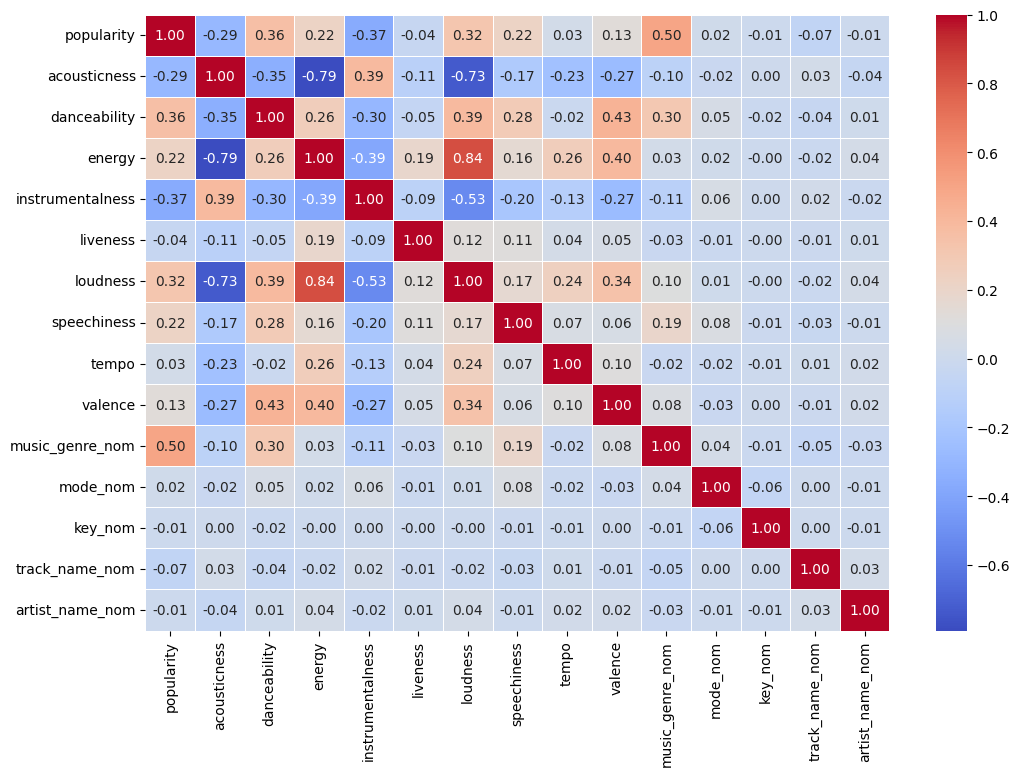

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

**Análise da Correlação**

Podemos notar que a dançabilidade e o gênero musical são os fatores que apresentam uma correlação positiva mais significativa com a popularidade. Em contraste, a acústica e a instrumentalidade demonstram uma correlação negativa nesta análise.

# **Análise gráfica do Dataframe**



Considerando nossa variável-alvo "popularity", realizaremos uma análise gráfica para obter insights relevantes.

**- Visualização da Distribuição da Popularidade**

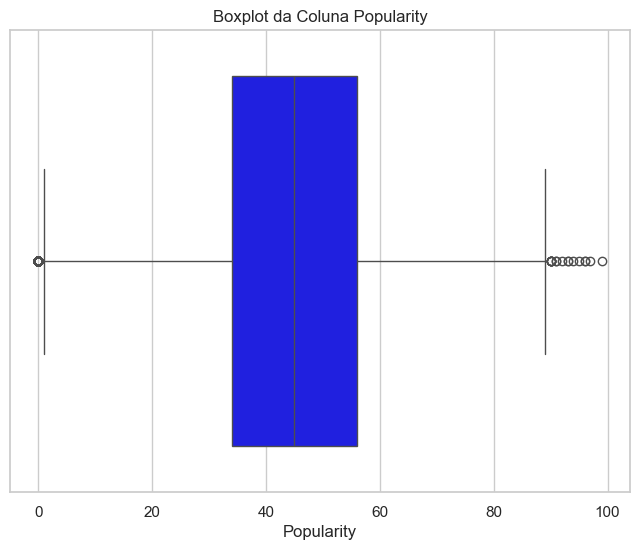

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x=analise_df['popularity'], color='blue')

plt.xlabel('Popularity')
plt.title('Boxplot da Coluna Popularity')

plt.show()

A predominância da popularidade das músicas em nosso banco de dados está centrada no intervalo de 35 a 55 unidades de medida. Vale notar que, considerando que músicas com pontuações de 80 são consideradas muito populares, nosso grupo de outliers começa a partir do número aproximado de 90.

**- Distribuição da Popularidade: Histograma**

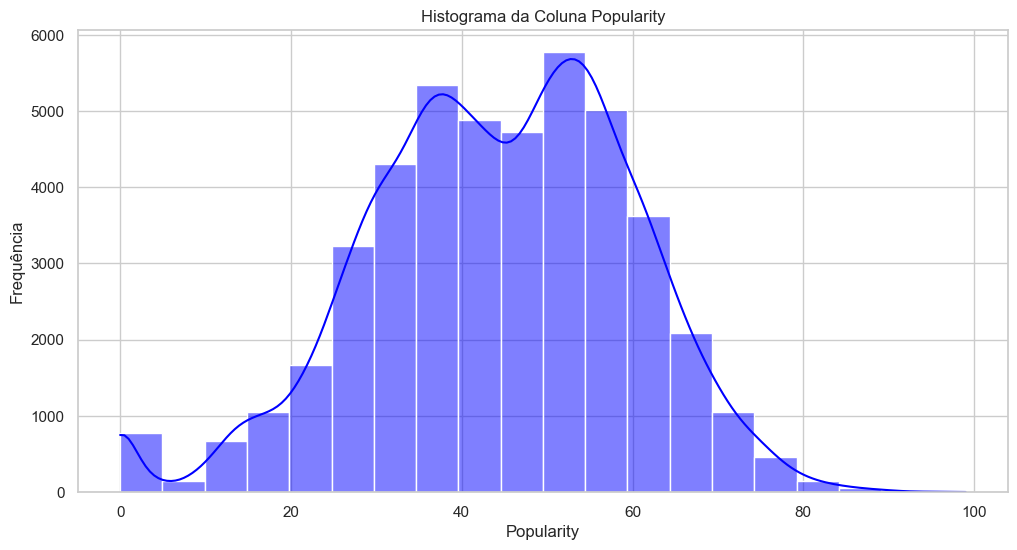

In [35]:

# Histograma da coluna 'popularity'
plt.figure(figsize=(12, 6))
sns.histplot(analise_df['popularity'], bins=20, kde=True, color='blue')
plt.xlabel('Popularity')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna Popularity')
plt.show()

**- Distribuição dos Gêneros Musicais: Histograma**

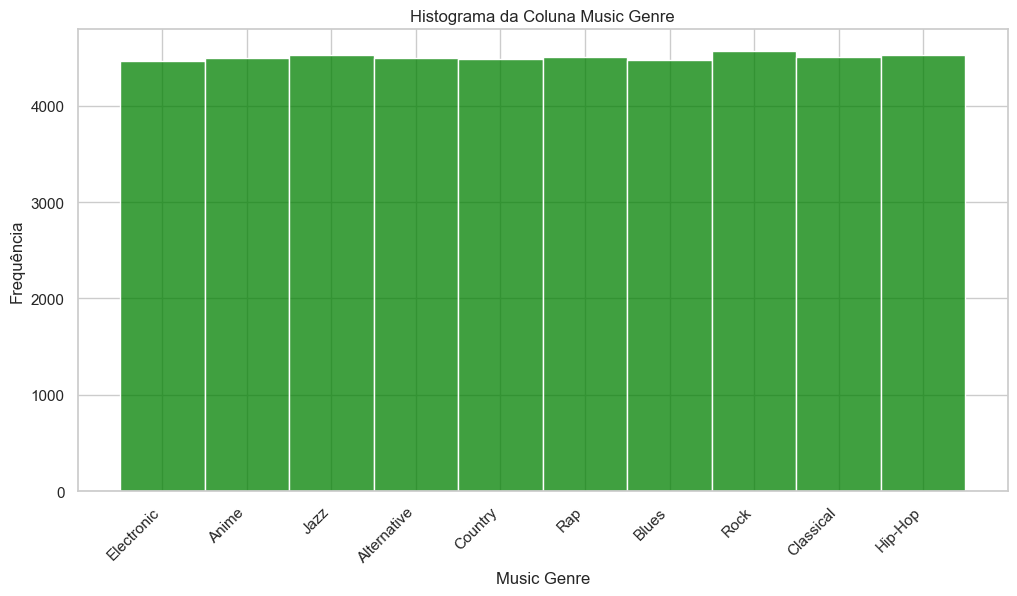

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(analise_df['music_genre'], bins=20, kde=False, color='green', discrete=True)
plt.xlabel('Music Genre')
plt.ylabel('Frequência')
plt.title('Histograma da Coluna Music Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos observar uma distribuição uniforme dos gêneros musicais em nosso banco de dados.

**- Média de Popularidade por Gênero Musical: Gráfico de Barras**

C:\Users\raull\AppData\Local\Temp\ipykernel_12276\3897860217.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='music_genre', y='popularity', data=analise_df, ci=None, palette='colorblind')
C:\Users\raull\AppData\Local\Temp\ipykernel_12276\3897860217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='music_genre', y='popularity', data=analise_df, ci=None, palette='colorblind')


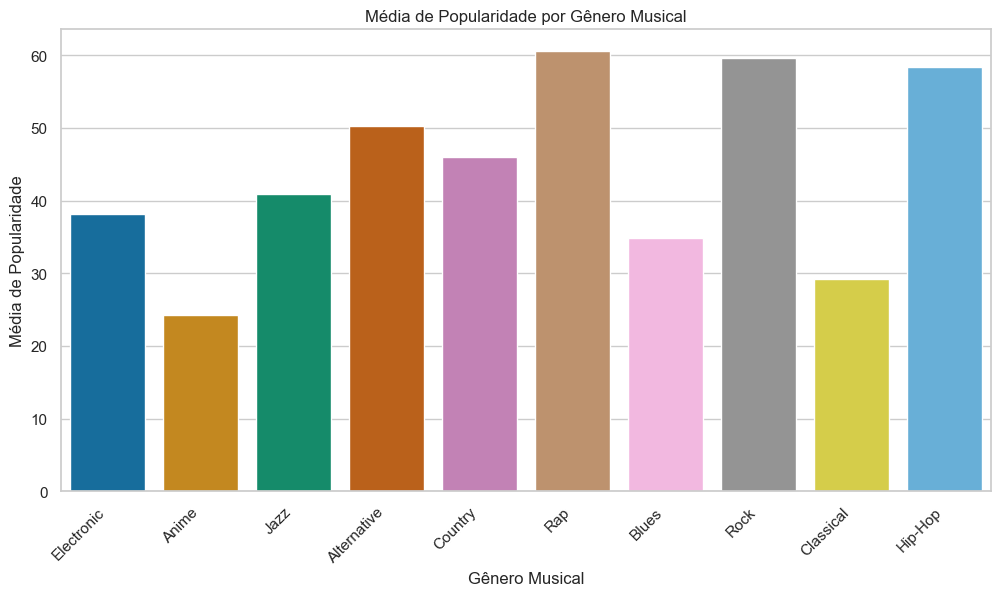

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='music_genre', y='popularity', data=analise_df, ci=None, palette='colorblind')
plt.xlabel('Gênero Musical')
plt.ylabel('Média de Popularidade')
plt.title('Média de Popularidade por Gênero Musical')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Os gêneros musicais que mais se destacam em termos de popularidade são Rap, Rock e Hip-Hop.

# **Scikit Learn - RandomForestRegressor**

**- Método 0**

Rodar a IA sem a normalização:
Modelos baseados em árvores, como o RandomForestRegressor,
podem não ser tão sensíveis à escala e podem funcionar bem sem a normalização.

Separar as características (x) e a variável alvo (y)

In [38]:
metodo_0 = analise_df

In [39]:
x_0 = metodo_0.drop(['artist_name', 'track_name', 'popularity', 'key', 'mode',  'music_genre'], axis=1)
y_0 = metodo_0['popularity']

Dividir os dados em conjunto de treinamento e teste

In [40]:
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.2, random_state=42)

Inicializar o modelo de regressão (RandomForestRegressor)

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

Treinar o modelo

In [42]:
model.fit(x_train_0, y_train_0)

RandomForestRegressor(random_state=42)

Fazer previsões no conjunto de teste

In [43]:
predictions_0 = model.predict(x_test_0)


Avaliar o desempenho do modelo

In [44]:
mse_0 = mean_squared_error(y_test_0, predictions_0)
print(f'Mean Squared Error: {mse_0}')


Mean Squared Error: 83.45122263438473


Visualizar a importância das características

C:\Users\raull\AppData\Local\Temp\ipykernel_12276\2780376313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_0, y=feature_importances_0.index, palette='viridis')


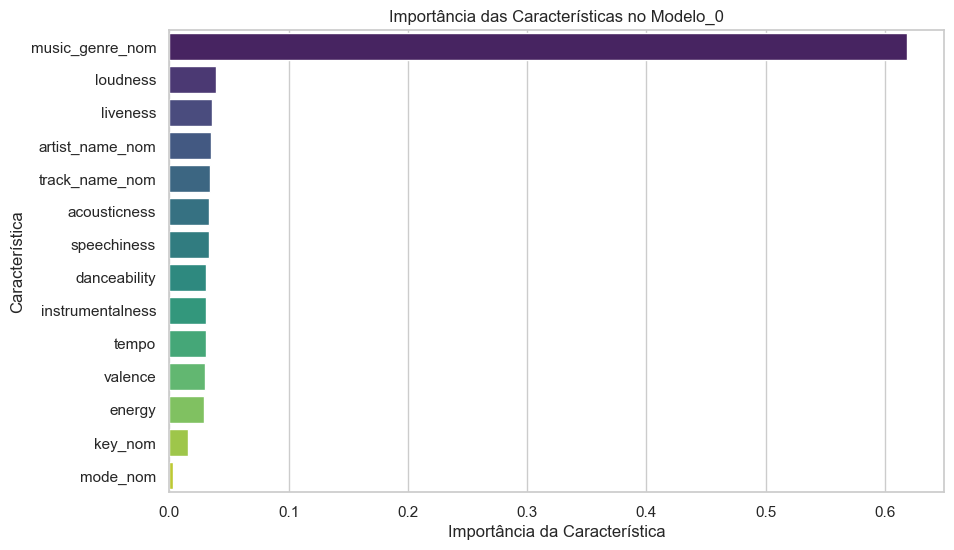

In [45]:
feature_importances_0 = pd.Series(model.feature_importances_, index=x_0.columns)
feature_importances_0 = feature_importances_0.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_0, y=feature_importances_0.index, palette='viridis')
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características no Modelo_0')
plt.show()

**- Método 1**

Z-score normalization ou Padronização

Coluna "tempo"

In [46]:
analise_df_1 = analise_df

In [47]:
media_tempo = analise_df_1['tempo'].mean()
desvio_padrao_tempo = analise_df_1['tempo'].std()

analise_df_1['tempo'] = analise_df_1['tempo'].apply(lambda valor: (valor - media_tempo) / desvio_padrao_tempo)

Coluna "loudness"

In [48]:
media_loudness = analise_df_1['loudness'].mean()
desvio_padrao_loudness = analise_df_1['loudness'].std()

analise_df_1['loudness'] = analise_df_1['loudness'].apply(lambda valor: (valor - media_loudness) / desvio_padrao_loudness)

Separar as características (x) e a variável alvo (y)

In [49]:
metodo_1 = analise_df_1

In [50]:
x_1 = metodo_1.drop(['artist_name', 'track_name', 'popularity', 'key', 'mode',  'music_genre'], axis=1)
y_1 = metodo_1['popularity']

Dividir os dados em conjunto de treinamento e teste

In [51]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=42)

Inicializar o modelo de regressão (RandomForestRegressor)

In [52]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

Treinar o modelo

In [53]:
model.fit(x_train_1, y_train_1)

RandomForestRegressor(random_state=42)

Fazer previsões no conjunto de teste

In [54]:
predictions_1 = model.predict(x_test_1)


Avaliar o desempenho do modelo

In [55]:
mse_1 = mean_squared_error(y_test_1, predictions_1)
print(f'Mean Squared Error: {mse_1}')


Mean Squared Error: 83.4482142825411


Visualizar a importância das características

C:\Users\raull\AppData\Local\Temp\ipykernel_12276\2416168273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_1, y=feature_importances_1.index, palette='viridis')


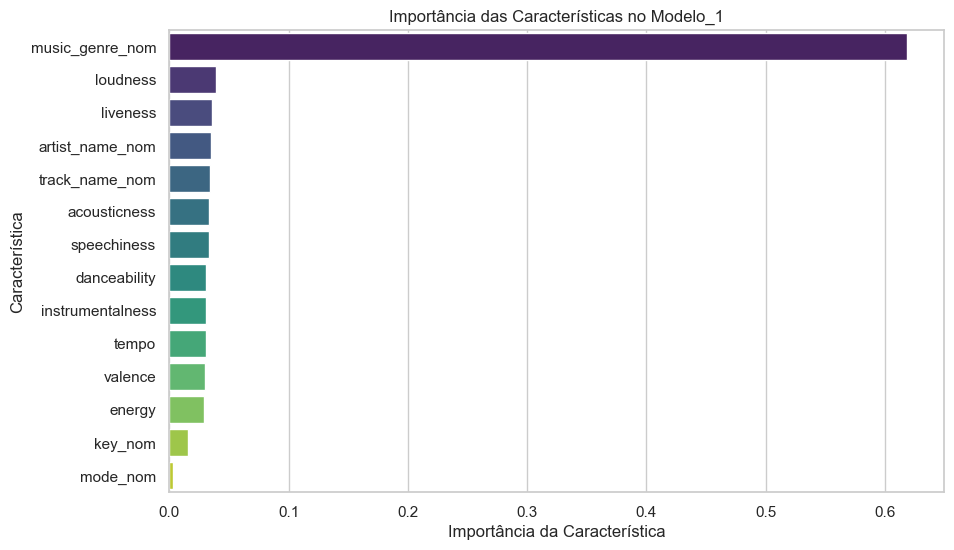

In [56]:
feature_importances_1 = pd.Series(model.feature_importances_, index=x_1.columns)
feature_importances_1 = feature_importances_1.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_1, y=feature_importances_1.index, palette='viridis')
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características no Modelo_1')
plt.show()

**- Método 2**

Normalização Min-Max

In [57]:
from sklearn.preprocessing import MinMaxScaler

Coluna "tempo"

In [58]:
analise_df_2 = analise_df

In [59]:
# Criar uma instância do scaler
scaler = MinMaxScaler()

# Ajustar e transformar a coluna tempo
analise_df_2['tempo'] = scaler.fit_transform(analise_df_2['tempo'].values.reshape(-1, 1))

Coluna "loudness"

In [60]:
# Ajustar e transformar a coluna loudness
analise_df_2['loudness'] = scaler.fit_transform(analise_df_2['loudness'].values.reshape(-1, 1))

Separar as características (x) e a variável alvo (y)

In [61]:
metodo_2 = analise_df_2

In [62]:
x_2 = metodo_2.drop(['artist_name', 'track_name', 'popularity', 'key', 'mode',  'music_genre'], axis=1)
y_2 = metodo_2['popularity']

Dividir os dados em conjunto de treinamento e teste

In [63]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

Inicializar o modelo de regressão (RandomForestRegressor)

In [64]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

Treinar o modelo

In [65]:
model.fit(x_train_2, y_train_2)

RandomForestRegressor(random_state=42)

Fazer previsões no conjunto de teste

In [66]:
predictions_2 = model.predict(x_test_2)


Avaliar o desempenho do modelo

In [67]:
mse_2 = mean_squared_error(y_test_2, predictions_2)
print(f'Mean Squared Error: {mse_2}')


Mean Squared Error: 83.44759395824079


Visualizar a importância das características

C:\Users\raull\AppData\Local\Temp\ipykernel_12276\3599326891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_2, y=feature_importances_2.index, palette='viridis')


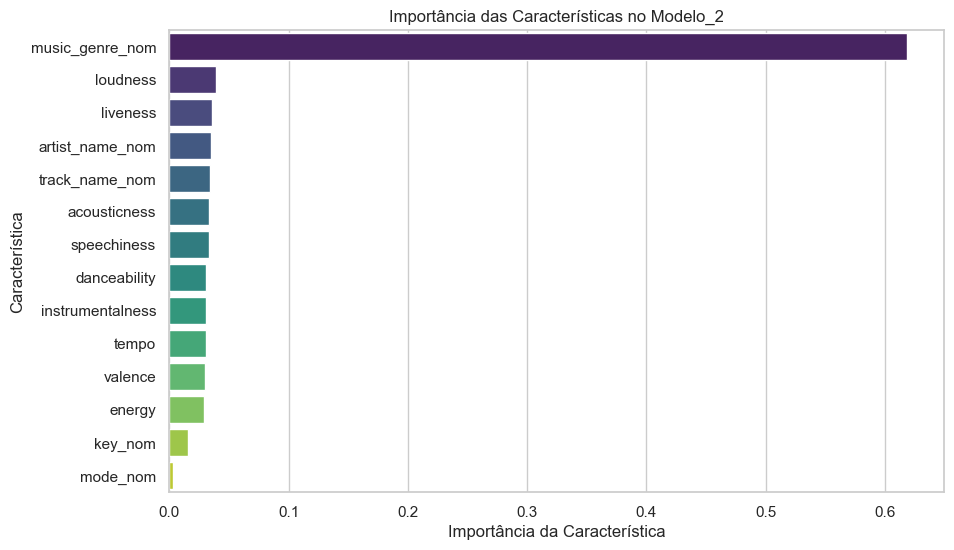

In [68]:
feature_importances_2 = pd.Series(model.feature_importances_, index=x_2.columns)
feature_importances_2 = feature_importances_2.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_2, y=feature_importances_2.index, palette='viridis')
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características no Modelo_2')
plt.show()

# **Análise do MSE**

In [69]:
print(f'MSE Método 0: {mse_0}')
print(f'MSE Método 1: {mse_1}')
print(f'MSE Método 2: {mse_2}')

MSE Método 0: 83.45122263438473
MSE Método 1: 83.4482142825411
MSE Método 2: 83.44759395824079


A alteração causada pelos métodos confirma nossa análise inicial, indicando que o modelo de regressão (RandomForestRegressor) não apresenta sensibilidade a variações nas grandezas numéricas escalares.